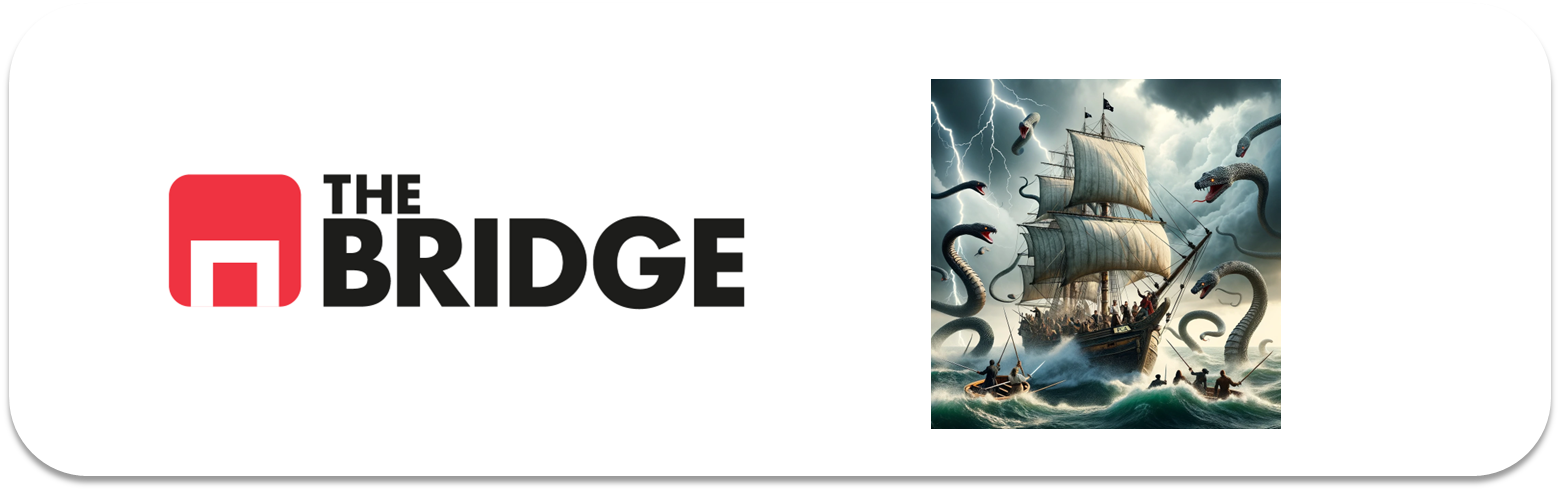

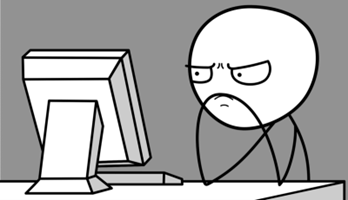

Para ejercitarte y afianzar lo aprendido sobre **PCA**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)

La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

# Principal Components Analysis: Nutrition
En esta colección de ejercicios no vas a montar ningún modelo de Machine Learning supervisado, sino que vas a practicar con PCA: pretratar el dato antes de calcular sus PCs, interpretarlas, pintar y escoger número de componentes según varianza.


### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [91]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

import Funciones as fc


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale



### Ejercicio 1: Importa los datos
1. Importa los datos: *nutrition.csv*
2. Observa las columnas que hay, así como su tipo.

In [92]:
df = pd.read_csv("./data/nutrition.csv")

df

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,83110,Finfish and Shellfish Products,"MACKEREL,SALTED","Fish, mackerel, salted",NaN,NaN,NaN,305.0,18.50,25.10,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,90240,Finfish and Shellfish Products,"SCALLOP,(BAY&SEA),CKD,STMD","Mollusks, scallop, (bay and sea), cooked, steamed",NaN,NaN,NaN,111.0,20.54,0.84,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,90480,Sweets,"SYRUP,CANE","Syrup, Cane",NaN,NaN,NaN,269.0,0.00,0.00,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90560,Finfish and Shellfish Products,"SNAIL,RAW","Mollusks, snail, raw",NaN,NaN,NaN,90.0,16.10,1.40,...,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [93]:
fc.describe_df(df).T

,DATA_TYPE,MISSINGS (%),UNIQUE_VALUES,CARDIN (%)
COL_N,,,,
ID,int64,0.0,8618,1.0
FoodGroup,object,0.0,25,0.0
ShortDescrip,object,0.0,8614,1.0
Descrip,object,0.0,8618,1.0
CommonName,object,87.7,443,0.01
MfgName,object,81.9,92,0.0
ScientificName,object,91.5,469,0.0
Energy_kcal,float64,0.0,666,0.08
Protein_g,float64,0.0,2642,0.31


| Variable           | Tipo      | % Valores Faltantes | Valores Únicos | Cardinalidad (%) | Descripción breve                                               |
|--------------------|-----------|---------------------|----------------|------------------|-----------------------------------------------------------------|
| ID                 | int64     | 0.0                 | 8618           | 100.0            | Identificador único del producto                                |
| FoodGroup          | object    | 0.0                 | 25             | 0.29             | Grupo alimentario al que pertenece el producto                  |
| ShortDescrip       | object    | 0.0                 | 8614           | 99.95            | Descripción corta del producto                                  |
| Descrip            | object    | 0.0                 | 8618           | 100.0            | Descripción completa del producto                               |
| CommonName         | object    | 87.7                | 443            | 5.14             | Nombre común del producto (puede estar ausente)                 |
| MfgName            | object    | 81.9                | 92             | 1.07             | Nombre del fabricante (puede estar ausente)                     |
| ScientificName     | object    | 91.5                | 469            | 5.44             | Nombre científico del producto (puede estar ausente)            |
| Energy_kcal        | float64   | 0.0                 | 666            | 7.73             | Energía en kilocalorías                                         |
| Protein_g          | float64   | 0.0                 | 2642           | 30.66            | Cantidad de proteína en gramos                                  |
| Fat_g              | float64   | 0.0                 | 2405           | 27.91            | Cantidad de grasa en gramos                                     |
| Carb_g             | float64   | 0.0                 | 3199           | 37.11            | Cantidad de carbohidratos en gramos                             |
| Sugar_g            | float64   | 0.0                 | 1851           | 21.48            | Cantidad de azúcar en gramos                                    |
| Fiber_g            | float64   | 0.0                 | 253            | 2.93             | Cantidad de fibra en gramos                                     |
| VitA_mcg           | float64   | 0.0                 | 562            | 6.52             | Cantidad de vitamina A en microgramos                           |
| VitB6_mg           | float64   | 0.0                 | 991            | 11.50            | Cantidad de vitamina B6 en miligramos                           |
| VitB12_mcg         | float64   | 0.0                 | 698            | 8.10             | Cantidad de vitamina B12 en microgramos                         |
| VitC_mg            | float64   | 0.0                 | 564            | 6.55             | Cantidad de vitamina C en miligramos                            |
| VitE_mg            | float64   | 0.0                 | 548            | 6.36             | Cantidad de vitamina E en miligramos                            |
| Folate_mcg         | float64   | 0.0                 | 436            | 5.06             | Cantidad de folato en microgramos                               |
| Niacin_mg          | float64   | 0.0                 | 3735           | 43.34            | Cantidad de niacina en miligramos                               |
| Riboflavin_mg      | float64   | 0.0                 | 830            | 9.63             | Cantidad de riboflavina en miligramos                           |
| Thiamin_mg         | float64   | 0.0                 | 906            | 10.51            | Cantidad de tiamina en miligramos                               |
| Calcium_mg         | float64   | 0.0                 | 554            | 6.43             | Cantidad de calcio en miligramos                                |
| Copper_mcg         | float64   | 0.0                 | 803            | 9.31             | Cantidad de cobre en microgramos                                |
| Iron_mg            | float64   | 0.0                 | 948            | 11.00            | Cantidad de hierro en miligramos                                |
| Magnesium_mg       | float64   | 0.0                 | 309            | 3.59             | Cantidad de magnesio en miligramos                              |
| Manganese_mg       | float64   | 0.0                 | 1230           | 14.27            | Cantidad de manganeso en miligramos                             |
| Phosphorus_mg      | float64   | 0.0                 | 641            | 7.44             | Cantidad de fósforo en miligramos                               |
| Selenium_mcg       | float64   | 0.0                 | 643            | 7.46             | Cantidad de selenio en microgramos                              |
| Zinc_mg            | float64   | 0.0                 | 936            | 10.86            | Cantidad de zinc en miligramos                                  |
| VitA_USRDA         | float64   | 0.0                 | 562            | 6.52             | Porcentaje de la recomendación diaria de vitamina A             |
| VitB6_USRDA        | float64   | 0.0                 | 991            | 11.50            | Porcentaje de la recomendación diaria de vitamina B6            |
| VitB12_USRDA       | float64   | 0.0                 | 698            | 8.10             | Porcentaje de la recomendación diaria de vitamina B12           |
| VitC_USRDA         | float64   | 0.0                 | 564            | 6.55             | Porcentaje de la recomendación diaria de vitamina C             |
| VitE_USRDA         | float64   | 0.0                 | 548            | 6.36             | Porcentaje de la recomendación diaria de vitamina E             |
| Folate_USRDA       | float64   | 0.0                 | 436            | 5.06             | Porcentaje de la recomendación diaria de folato                 |
| Niacin_USRDA       | float64   | 0.0                 | 3735           | 43.34            | Porcentaje de la recomendación diaria de niacina                |
| Riboflavin_USRDA   | float64   | 0.0                 | 830            | 9.63             | Porcentaje de la recomendación diaria de riboflavina            |
| Thiamin_USRDA      | float64   | 0.0                 | 906            | 10.51            | Porcentaje de la recomendación diaria de tiamina                |
| Calcium_USRDA      | float64   | 0.0                 | 554            | 6.43             | Porcentaje de la recomendación diaria de calcio                 |
| Copper_USRDA       | float64   | 0.0                 | 803            | 9.31             | Porcentaje de la recomendación diaria de cobre                  |
| Magnesium_USRDA    | float64   | 0.0                 | 309            | 3.59             | Porcentaje de la recomendación diaria de magnesio               |
| Phosphorus_USRDA   | float64   | 0.0                 | 641            | 7.44             | Porcentaje de la recomendación diaria de fósforo                |
| Selenium_USRDA     | float64   | 0.0                 | 643            | 7.46             | Porcentaje de la recomendación diaria de selenio                |
| Zinc_USRDA         | float64   | 0.0                 | 936            | 10.86            | Porcentaje de la recomendación diaria de zinc                   |


### Ejercicio 2


Analiza la correlación entre las variables numéricas. 

In [94]:
features_num = df.select_dtypes(include=["int","float"]).columns.to_list()
features_num

['ID',
 'Energy_kcal',
 'Protein_g',
 'Fat_g',
 'Carb_g',
 'Sugar_g',
 'Fiber_g',
 'VitA_mcg',
 'VitB6_mg',
 'VitB12_mcg',
 'VitC_mg',
 'VitE_mg',
 'Folate_mcg',
 'Niacin_mg',
 'Riboflavin_mg',
 'Thiamin_mg',
 'Calcium_mg',
 'Copper_mcg',
 'Iron_mg',
 'Magnesium_mg',
 'Manganese_mg',
 'Phosphorus_mg',
 'Selenium_mcg',
 'Zinc_mg',
 'VitA_USRDA',
 'VitB6_USRDA',
 'VitB12_USRDA',
 'VitC_USRDA',
 'VitE_USRDA',
 'Folate_USRDA',
 'Niacin_USRDA',
 'Riboflavin_USRDA',
 'Thiamin_USRDA',
 'Calcium_USRDA',
 'Copper_USRDA',
 'Magnesium_USRDA',
 'Phosphorus_USRDA',
 'Selenium_USRDA',
 'Zinc_USRDA']

                        ID  Energy_kcal  Protein_g     Fat_g    Carb_g  \
ID                1.000000     0.126126   0.075538 -0.011996  0.177297   
Energy_kcal       0.126126     1.000000   0.110302  0.806795  0.487096   
Protein_g         0.075538     0.110302   1.000000  0.054715 -0.301974   
Fat_g            -0.011996     0.806795   0.054715  1.000000 -0.054116   
Carb_g            0.177297     0.487096  -0.301974 -0.054116  1.000000   
Sugar_g           0.082710     0.313151  -0.266170 -0.001962  0.615344   
Fiber_g           0.008252     0.197338  -0.072777 -0.028842  0.458192   
VitA_mcg         -0.031211     0.026329   0.026483  0.024379  0.001871   
VitB6_mg         -0.060463     0.121872   0.228485 -0.046950  0.195571   
VitB12_mcg        0.016512    -0.012292   0.245423 -0.020786 -0.094636   
VitC_mg          -0.020974    -0.033495  -0.066456 -0.059993  0.076745   
VitE_mg          -0.056898     0.303701  -0.029481  0.338008  0.070298   
Folate_mcg       -0.051166     0.14593

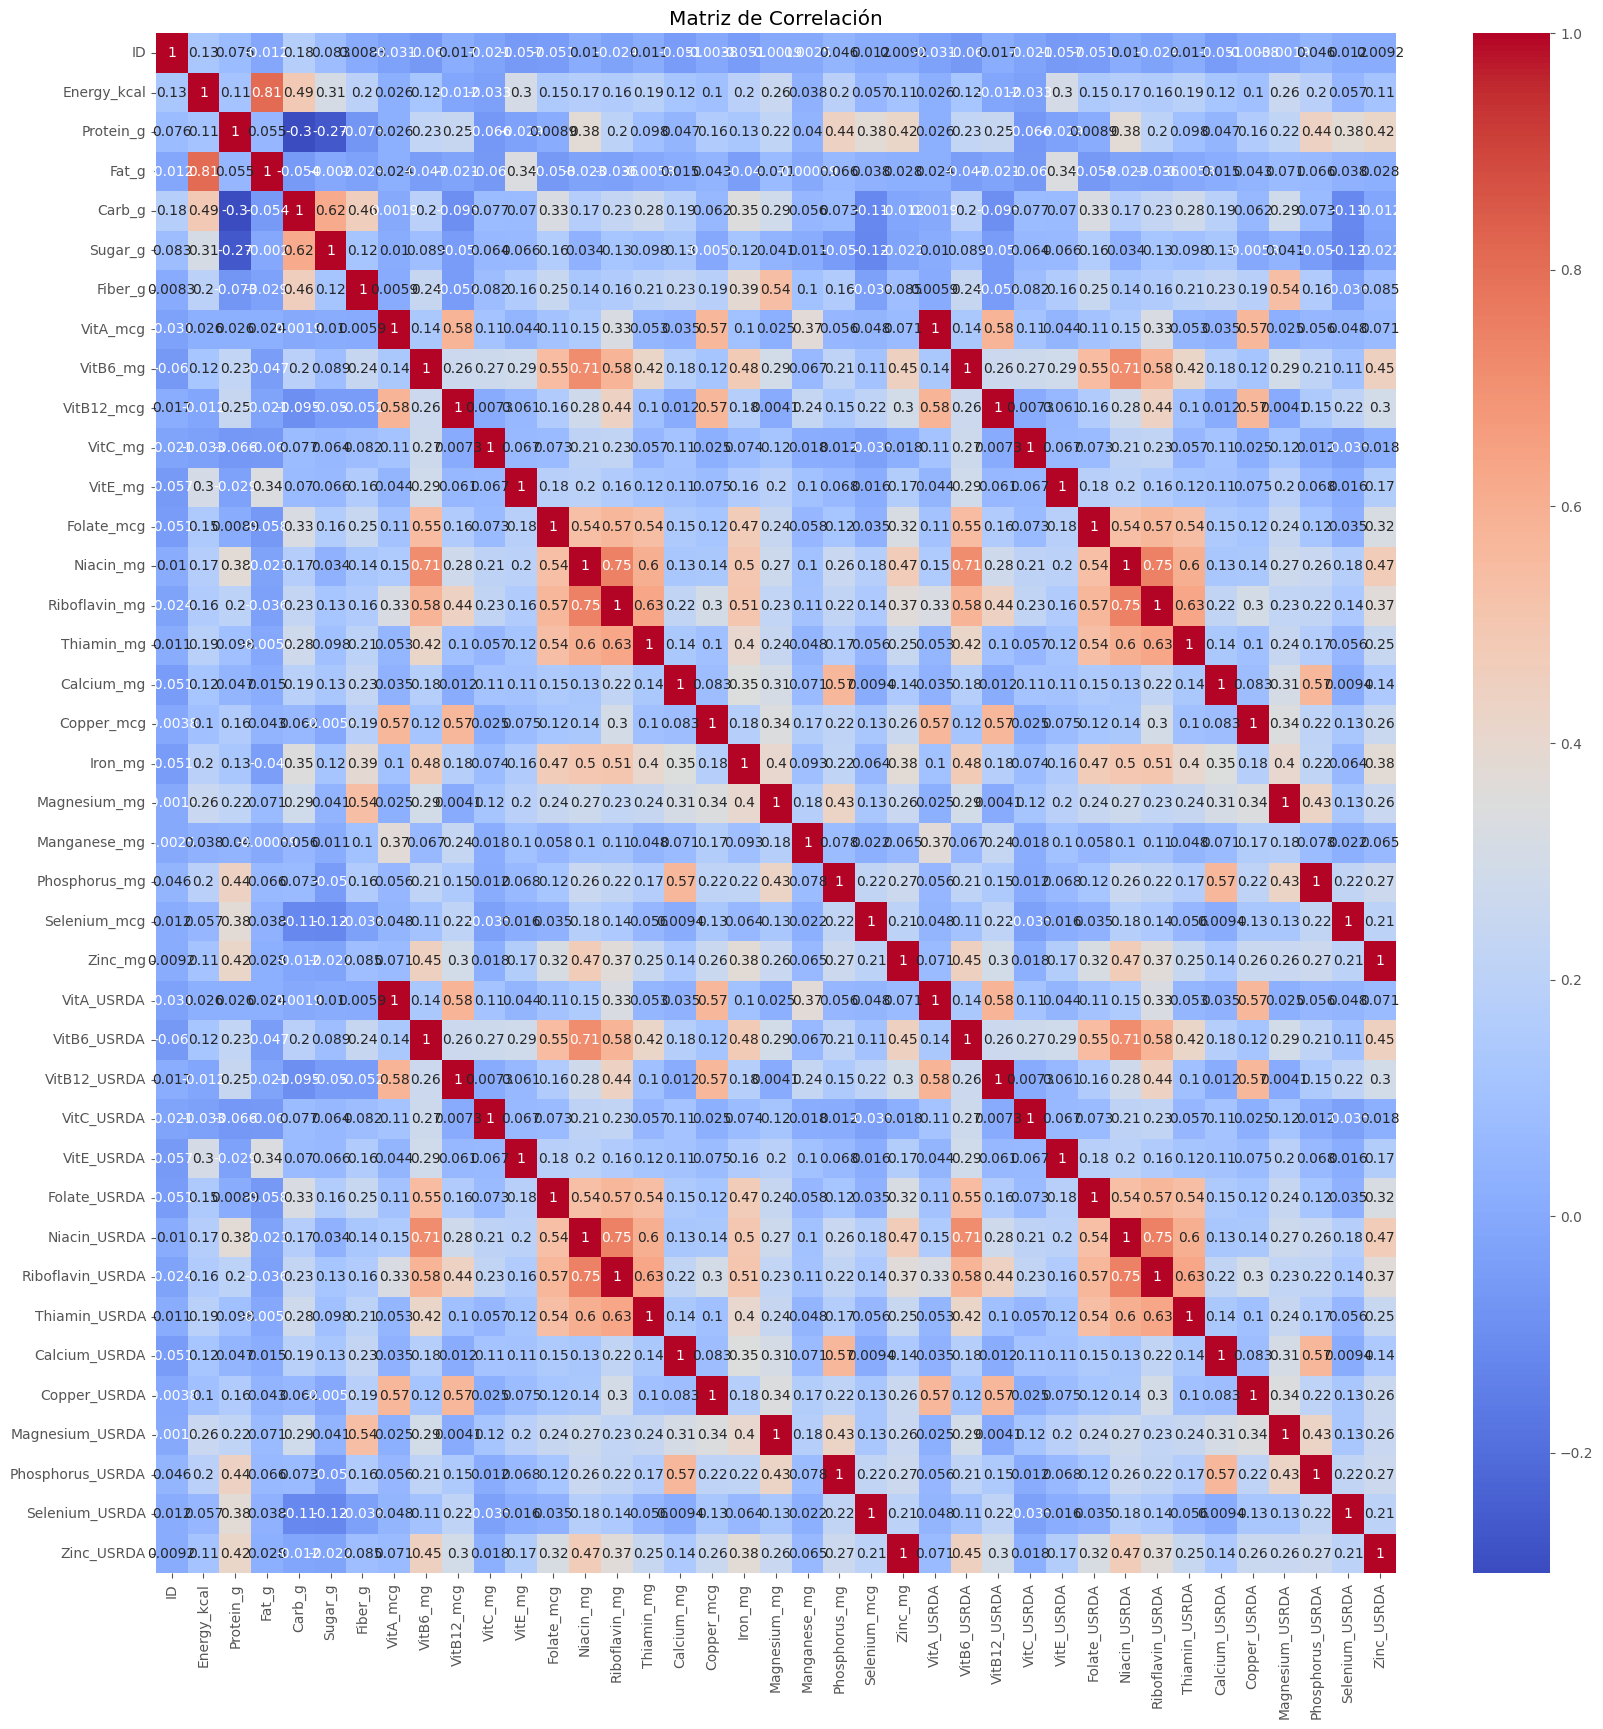

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que df es tu DataFrame
correlation_matrix = df[features_num].corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',)
plt.title('Matriz de Correlación')
plt.show()


### Ejercicio 3

¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

In [96]:
# Las 15 columnas USRDA significa United States Recommended Daily Allowance, que en español se traduce como Ingesta Diaria Recomendada de los Estados Unidos. 
# Se refiere a la cantidad diaria de nutrientes que se recomienda consumir para mantener una buena salud, según las guías nutricionales establecidas por las autoridades de salud de los Estados Unidos.
# Estas recomendaciones se utilizan como referencia para evaluar y planificar dietas equilibradas que aseguren la ingesta adecuada de nutrientes esenciales como vitaminas, minerales y otros componentes dietéticos.
# Estos datos son el porcentaje de la cantidad del elemento en el alimento dividido por la cantidad total recomendada al dia, por lo tanto hay una correlacion directa entre las 2 variables. 

### Ejercicio 4: Variables Categóricas

Podríamos analizar las variables no numéricas del dataset e intentar obtener más información, pero por simplicidad en este caso procedemos a eliminarlas. Elimina las variables de texto del dataset.

In [97]:
df_copia = df.copy()
df = df[features_num]

In [98]:
df = df.set_index("ID")
df

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
ID,,,,,,,,,,,,,,,,,,,,,
1001,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1002,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
1003,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
1004,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
1005,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83110,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
90240,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
90480,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273


### Ejercicio 5: Distribuciones

Analiza la distribución de las variables/columnas/features restantes. Recuerda que PCA es altamente sensible a las escala, así que transforma aquellas variables que creas necesario antes de proceder a escalarlas.


In [99]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Energy_kcal,8618.0,226.438617,169.388910,0.0,93.000000,191.000000,336.000000,902.000000
Protein_g,8618.0,11.523910,10.550590,0.0,2.470000,8.285000,19.977500,88.320000
Fat_g,8618.0,10.647024,15.866353,0.0,0.992500,5.235000,13.900000,100.000000
Carb_g,8618.0,21.819062,27.239000,0.0,0.040000,8.945000,32.900000,100.000000
Sugar_g,8618.0,6.560253,13.602098,0.0,0.000000,0.370000,5.300000,99.800000
Fiber_g,8618.0,2.023242,4.313670,0.0,0.000000,0.300000,2.400000,79.000000
VitA_mcg,8618.0,93.968786,779.362205,0.0,0.000000,1.500000,21.000000,30000.000000
VitB6_mg,8618.0,0.264369,0.478614,0.0,0.034250,0.120000,0.355000,12.000000
VitB12_mcg,8618.0,1.225260,4.319183,0.0,0.000000,0.080000,1.297500,98.890000
VitC_mg,8618.0,7.925377,57.582758,0.0,0.000000,0.000000,2.500000,2400.000000


### Ejercicio 6: Estandarizado
Estandariza cada variable. (No es necesario que dividas en train y test por simplificar).

In [100]:
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)

df_scaled

array([[ 2.89623357, -1.01174721,  4.44128945, ..., -0.64991809,
        -0.41055694, -0.55991833],
       [ 2.89623357, -1.01174721,  4.44128945, ..., -0.65484222,
        -0.41055694, -0.57183012],
       [ 3.83495634, -1.06577576,  5.59915265, ..., -0.75332487,
        -0.44590424, -0.58374191],
       ...,
       [ 0.25127886, -1.0923161 , -0.67108312, ..., -0.72870421,
        -0.42116113, -0.53013886],
       [-0.80552224,  0.43375349, -0.58284096, ...,  0.57126681,
         0.52261173, -0.28892514],
       [-0.81142615,  0.78446513, -0.63956806, ...,  0.11824661,
         0.14793037, -0.28892514]])

### Ejercicio 7: Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [101]:
from sklearn.decomposition import PCA

modelo_pca = PCA()
modelo_pca.fit(df_scaled)

PCA()

In [102]:
modelo_pca.components_.shape

(38, 38)

### Ejercicio 8

Muestra en un dataframe la relación de cada componente con cada feature. En general, este paso no lo haremos salvo que sea necesario a posteriori explicar la influencia de alguna componente en función de las features originales, pero ahora, muéstralas.

In [103]:
pd.DataFrame(
    data=modelo_pca.components_, 
    columns=features_num[1:],  
    index=[f"PC{i+1}" for i in range(modelo_pca.components_.shape[0])]  # Genera nombres dinámicamente
)



,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
PC1,9.326037e-02,1.109056e-01,1.314156e-02,9.894320e-02,3.880566e-02,1.123929e-01,0.109097,0.240479,0.147756,0.070302,...,0.212663,0.258820,0.262413,0.204840,0.118434,0.140444,0.166961,0.147768,0.075559,0.187761
PC2,-1.071765e-01,1.218127e-01,-1.777400e-02,-2.074949e-01,-1.366352e-01,-1.416637e-01,0.338184,-0.083039,0.359417,-0.051780,...,-0.131008,-0.058531,0.013584,-0.139936,-0.105687,0.306495,-0.089101,0.001314,0.134056,0.048168
PC3,1.454598e-01,1.490821e-01,1.364128e-01,9.074039e-03,-3.784872e-02,1.381360e-01,-0.063989,-0.123038,-0.066177,-0.086169,...,-0.165277,-0.146048,-0.161894,-0.144481,0.299013,0.102700,0.283290,0.364688,0.120335,0.034207
PC4,-1.497265e-01,3.462010e-01,-7.680216e-02,-2.937401e-01,-2.512697e-01,-2.058986e-01,-0.247484,0.067578,-0.029753,-0.118719,...,-0.027826,0.144890,-0.001114,0.030987,-0.082463,-0.193588,-0.095383,0.106191,0.302323,0.212849
PC5,3.689089e-01,3.427892e-02,4.395375e-01,-1.382478e-02,1.692238e-02,-2.573604e-02,-0.036248,0.009669,0.014009,-0.218295,...,0.004008,0.001327,-0.067236,-0.017366,-0.235700,0.009961,-0.009748,-0.141597,0.091094,0.099937
PC6,-5.758953e-02,3.276692e-02,7.479278e-02,-1.962173e-01,-1.097635e-01,-8.186199e-02,0.020855,0.164281,-0.018807,0.535416,...,-0.154704,0.047654,-0.029162,-0.206832,0.050245,-0.089592,-0.020617,0.000281,0.013649,0.019181
PC7,-1.032425e-01,2.783297e-02,-1.761965e-01,8.454999e-02,-6.693166e-02,3.179012e-01,-0.086161,0.031202,-0.100115,0.129593,...,-0.000068,-0.024349,-0.109894,-0.052122,-0.342900,0.169603,0.380611,-0.196099,0.157620,0.067867
PC8,2.906202e-01,-2.976513e-03,2.006487e-01,1.892129e-01,1.734728e-01,-6.031160e-02,0.056885,-0.113926,-0.030154,0.179636,...,-0.055606,0.034982,0.115581,0.143844,-0.046901,-0.050594,-0.046210,0.028532,0.427407,-0.314830
PC9,9.287599e-02,-1.093943e-01,-9.730380e-02,3.145051e-01,4.858235e-01,-7.412218e-03,-0.055642,0.103492,0.104117,0.016150,...,0.057285,-0.085647,-0.069182,-0.309768,0.098624,-0.028168,-0.161913,-0.086803,0.179595,0.287540
PC10,3.564976e-01,2.078697e-01,3.242700e-01,4.634476e-02,8.155522e-02,-1.241599e-01,-0.043153,-0.058795,-0.031206,0.145443,...,-0.173236,0.087540,0.027709,0.046485,-0.132252,0.100301,0.002567,0.051235,-0.313168,0.221824


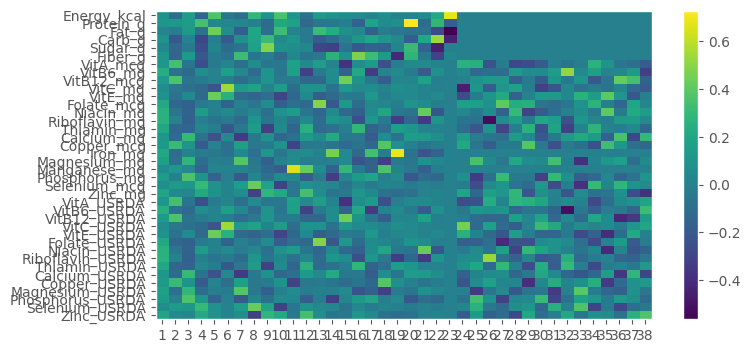

In [104]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(df.columns)), df.columns)
plt.xticks(range(len(df.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

### Ejercicio 9: Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.25970166 0.36798371 0.45817381 0.53534248 0.59800946 0.65309802
 0.69895517 0.74179035 0.7766913  0.81147316 0.83871436 0.86255858
 0.88560865 0.90624645 0.92339941 0.93844056 0.95224608 0.96373198
 0.97474002 0.9847084  0.99312962 0.99990011 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.        ]


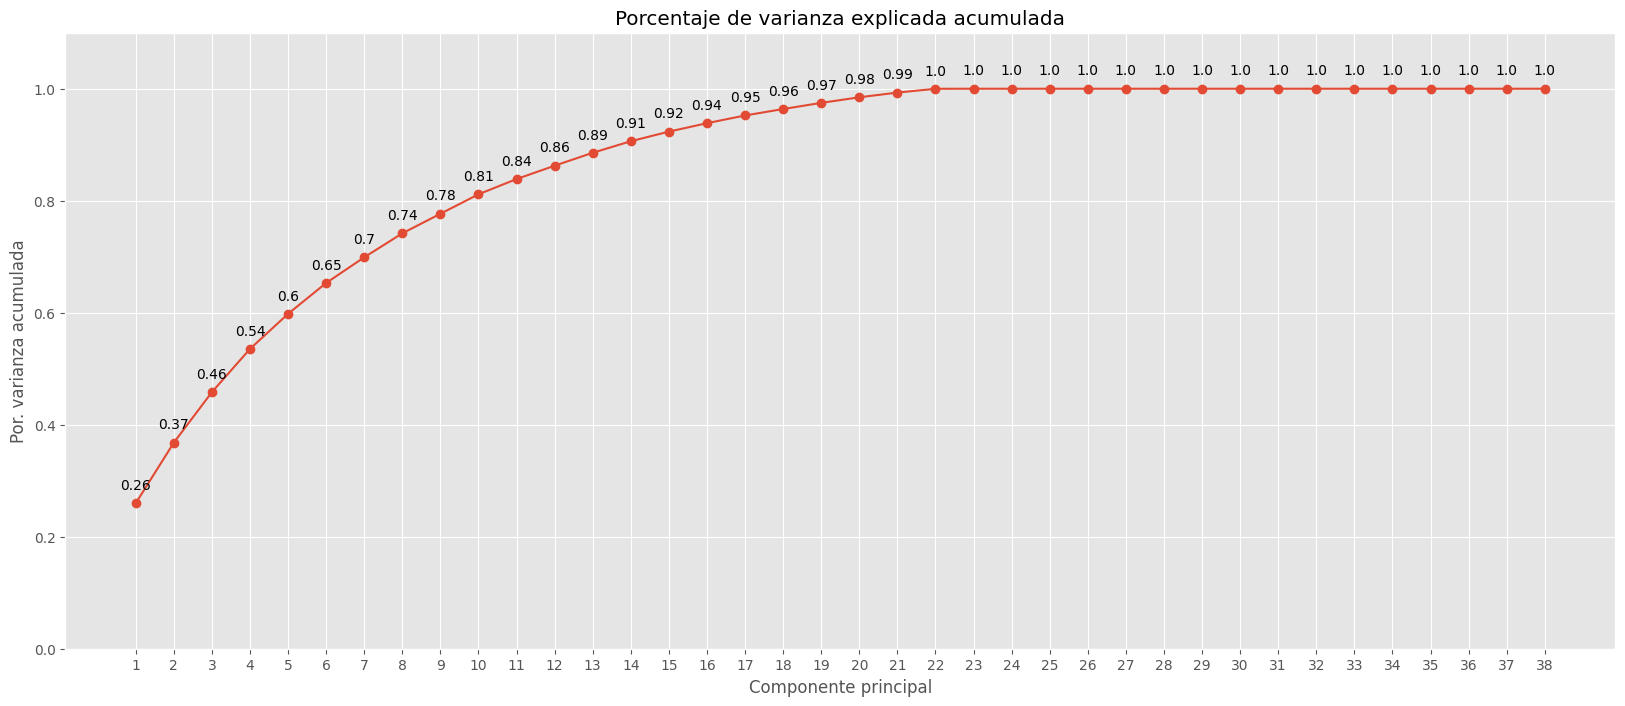

In [105]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 8))
ax.plot(
    np.arange(len(df.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(df.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [106]:
# Nos quedariomos con las 7-8-9 componentes podriamos explicar 0.7-0.78% de la varianza observada - nos quedamos con 9 

### Ejercicio 10: Reducción de features

Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.

In [107]:
modelo_pca = PCA(9)
modelo_pca.fit(df_scaled)

PCA(n_components=9)

In [111]:
modelo_pca.components_.shape

(9, 38)

In [121]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = modelo_pca.transform(X=df_scaled)
proyecciones = pd.DataFrame(
    proyecciones,
    columns =[f"PC{i+1}" for i in range(modelo_pca.components_.shape[0])]
)
proyecciones


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-1.811468,0.244360,0.358148,-1.705050,3.521139,0.552613,-1.680265,1.475408,-0.708498
1,-1.806892,0.251895,0.361289,-1.722863,3.519338,0.545058,-1.667116,1.477944,-0.715387
2,-1.788169,0.230042,0.503071,-2.111154,4.540671,0.657578,-1.953727,1.945396,-0.788197
3,0.404461,0.116966,2.611367,0.508961,-0.618369,0.435269,-2.658160,0.128548,0.055579
4,0.443959,0.118445,3.476585,0.350402,-0.985125,0.472345,-3.301049,0.167361,0.116149
...,...,...,...,...,...,...,...,...,...
8613,1.043757,2.526914,1.181932,1.661541,1.329422,0.652453,-0.109771,1.632799,0.502331
8614,-0.819215,0.819225,1.250838,1.359015,-0.718280,0.087358,-0.093824,-0.152917,-0.414429
8615,-1.696311,-1.327648,-0.934428,-2.552526,-0.101841,-1.316227,-0.172453,1.181518,3.083094
8616,0.699677,0.080787,3.054021,-0.119478,0.448425,0.499595,3.114522,-0.731586,-1.882250
